# inference on tranlated inputs

In [1]:
import cv2
from ultralytics import YOLOv10
import supervision as sv
from PIL import Image

model = YOLOv10("/home/hugo/yolov10/models/v10s_voc/weights/best.pt")
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def translate_image_by_fraction(image, x_fraction, y_fraction):
    """Translate the input image by a fraction of its size."""
    rows, cols, channels = image.shape
    x_shift = int(cols * x_fraction)
    y_shift = int(rows * y_fraction)
    translation_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

def inference(image_path, x_fraction=0, y_fraction=0):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or invalid image path")

    # Translate the image by fraction
    translated_image = translate_image_by_fraction(image, x_fraction, y_fraction)

    # Perform inference; assuming model and sv are properly defined
    results = model(translated_image)
    detections = sv.Detections.from_ultralytics(results[0])
    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    labels = [
        f"{class_name} {confidence:.2f}"
        for class_name, confidence in zip(detections['class_name'], detections.confidence)
    ]

    annotated_image = bounding_box_annotator.annotate(
        scene=translated_image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections, labels=labels
    )

    return Image.fromarray(annotated_image[..., ::-1]), labels

def translate_and_plot(image_path, fractions):
    plt.figure(figsize=(15, 30))
    for i, fraction in enumerate(fractions):
        translated_image, labels = inference(image_path, fraction, fraction)
        plt.subplot(1, len(fractions), i + 1)
        plt.imshow(translated_image)
        plt.title(f"Translation fraction: {fraction:.2f}", fontsize=18)
        plt.axis('off')
        
        # Construct the label to display under the subplot
        label_text = "\n".join(labels)
        plt.gca().text(0.5, -0.1, label_text, ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

fractions = [0.1 * (-1+i) for i in range(1, 4)]

/home/hugo/miniconda3/envs/yolov10/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



0: 544x800 1 bottle, 54.6ms
Speed: 2.3ms preprocess, 54.6ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 800)

0: 544x800 2 bottles, 9.2ms
Speed: 3.1ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 800)

0: 544x800 2 bottles, 8.9ms
Speed: 2.7ms preprocess, 8.9ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 800)


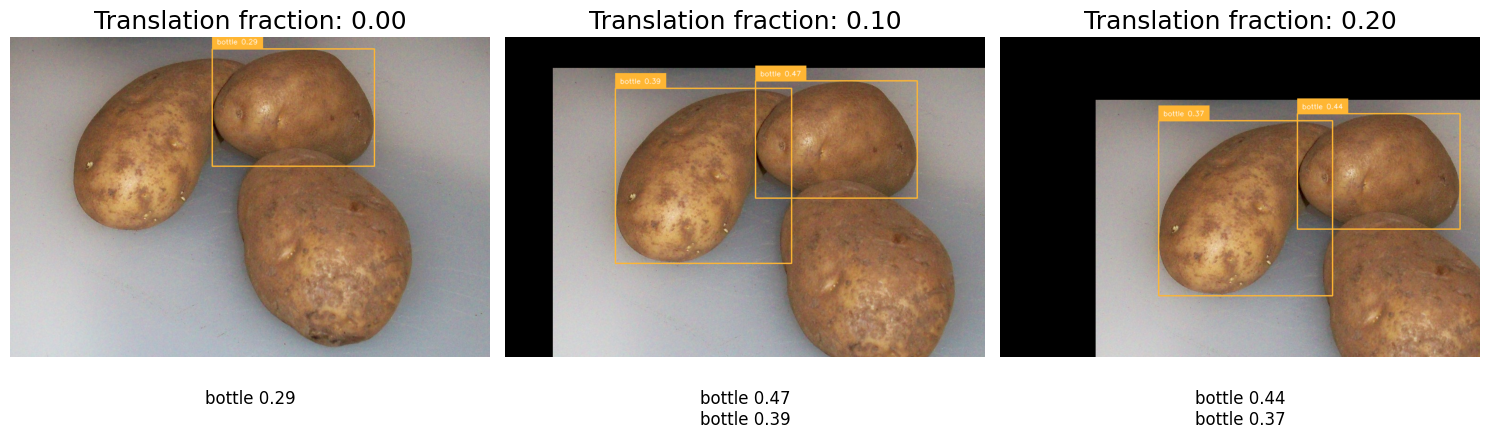

In [2]:
image_path = '/home/hugo/datasets/OOD-open/images/val/9fe983a5e5c8de75.jpg'
translate_and_plot(image_path, fractions)



0: 448x800 1 bottle, 48.0ms
Speed: 1.6ms preprocess, 48.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 800)

0: 448x800 1 bottle, 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 800)

0: 448x800 1 bottle, 6.3ms
Speed: 1.3ms preprocess, 6.3ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 800)


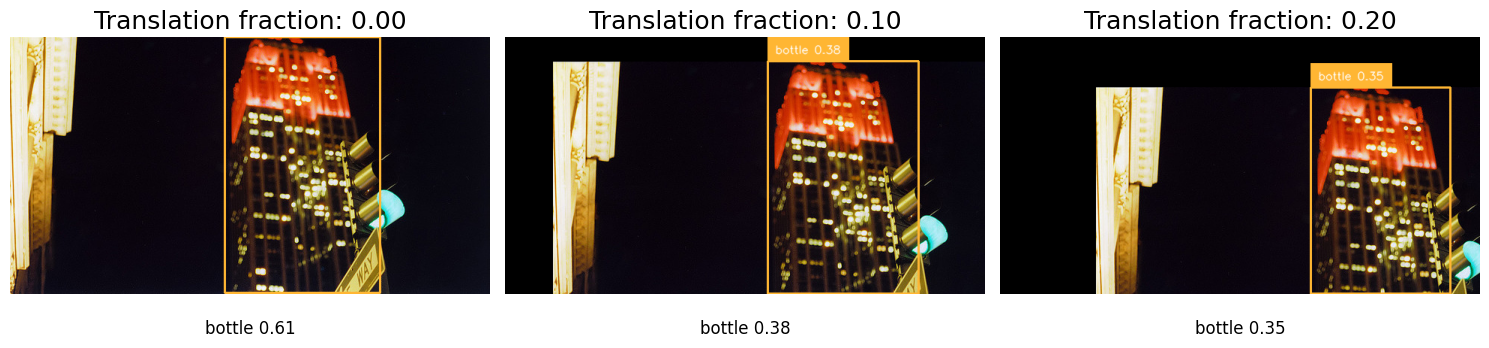

In [3]:
image_path = '/home/hugo/datasets/ID-voc-OOD-coco/images/val/000000351559.jpg'
translate_and_plot(image_path, fractions)


0: 608x800 1 train, 49.3ms
Speed: 2.3ms preprocess, 49.3ms inference, 0.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 boat, 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 0.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 800)


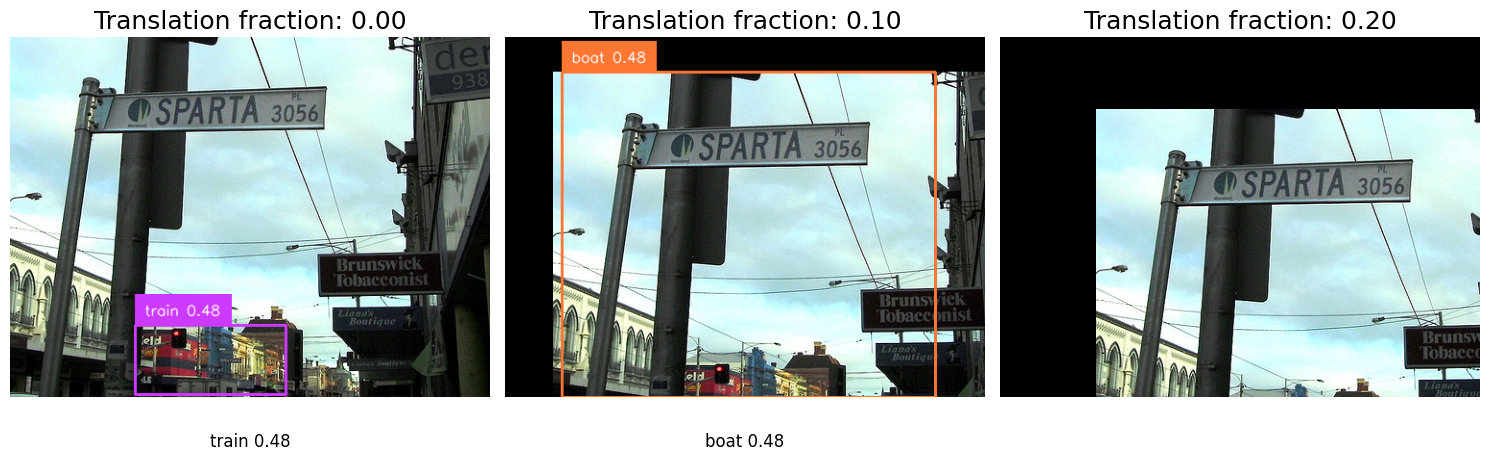

In [4]:
image_path = '/home/hugo/datasets/ID-voc-OOD-coco/images/val/000000516708.jpg'
translate_and_plot(image_path, fractions)


0: 416x800 2 horses, 48.2ms
Speed: 1.5ms preprocess, 48.2ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 800)

0: 416x800 2 horses, 1 person, 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 800)

0: 416x800 2 horses, 6.2ms
Speed: 1.4ms preprocess, 6.2ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 800)


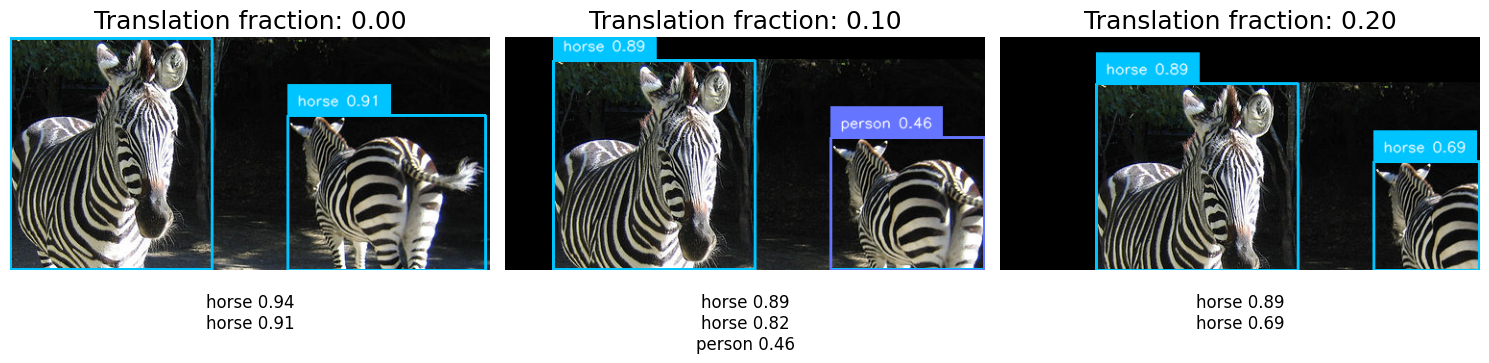

In [5]:
image_path = '/home/hugo/datasets/ID-voc-OOD-coco/images/val/000000504439.jpg'
translate_and_plot(image_path, fractions)


0: 448x800 1 cow, 2 horses, 12.8ms
Speed: 2.2ms preprocess, 12.8ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 800)

0: 448x800 1 cow, 1 dog, 2 horses, 7.2ms
Speed: 1.8ms preprocess, 7.2ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 800)

0: 448x800 1 cow, 2 horses, 6.4ms
Speed: 1.6ms preprocess, 6.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 800)


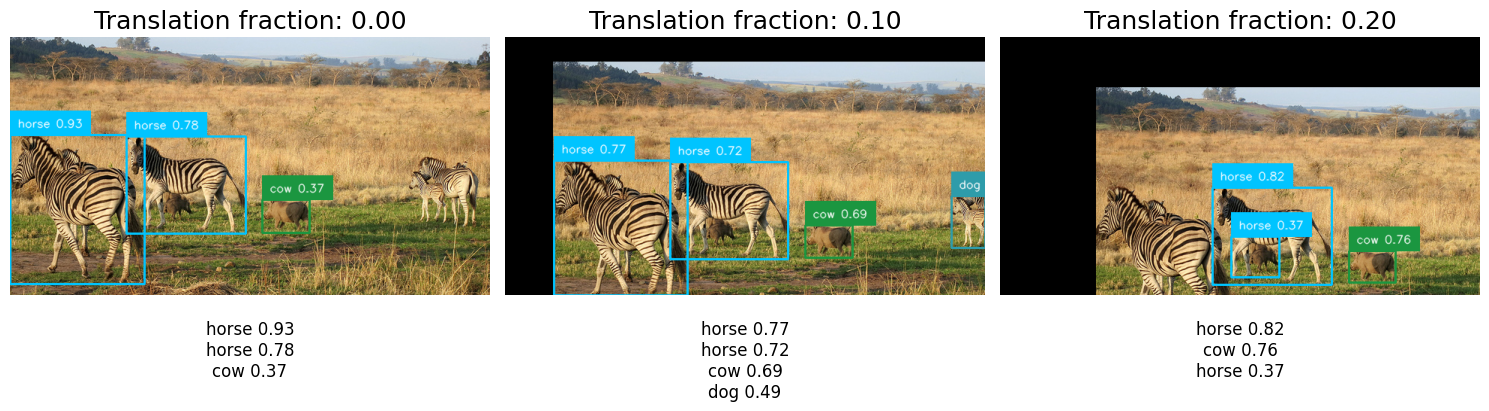

In [6]:
image_path = '/home/hugo/datasets/ID-voc-OOD-coco/images/val/000000110211.jpg'
translate_and_plot(image_path, fractions)


0: 544x800 1 bicycle, 1 person, 11.9ms
Speed: 2.3ms preprocess, 11.9ms inference, 0.9ms postprocess per image at shape (1, 3, 544, 800)

0: 544x800 1 bicycle, 1 person, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 0.8ms postprocess per image at shape (1, 3, 544, 800)

0: 544x800 1 bicycle, 1 person, 6.9ms
Speed: 1.8ms preprocess, 6.9ms inference, 0.8ms postprocess per image at shape (1, 3, 544, 800)


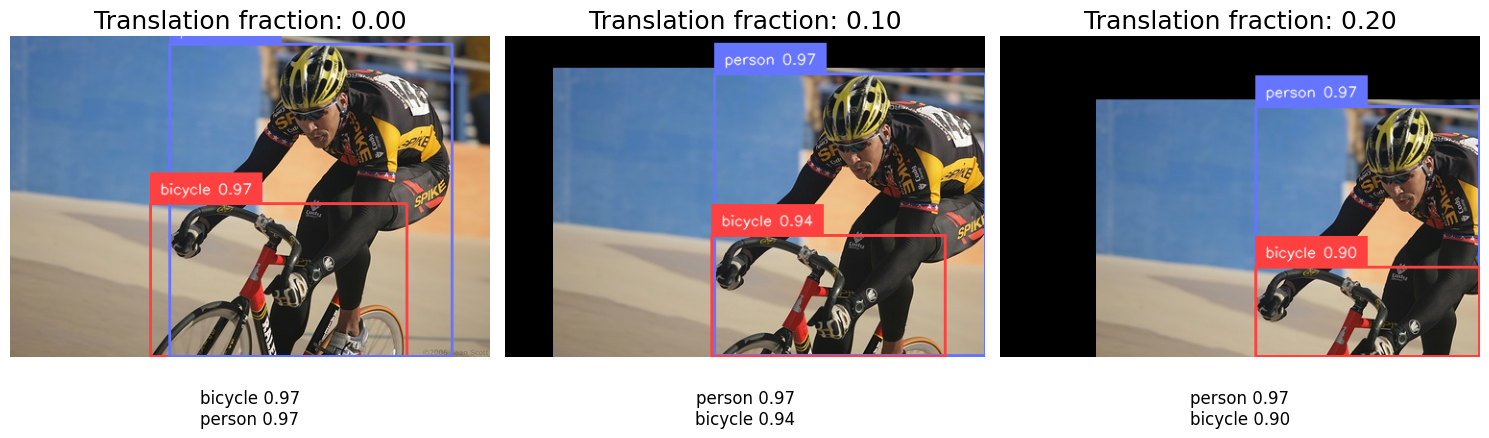

In [7]:
image_path = '/home/hugo/datasets/voc/images/val/006118.jpg'
translate_and_plot(image_path, fractions)


0: 512x800 1 person, 59.5ms
Speed: 3.0ms preprocess, 59.5ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 800)

0: 512x800 1 person, 6.5ms
Speed: 1.6ms preprocess, 6.5ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 800)

0: 512x800 1 person, 6.5ms
Speed: 1.6ms preprocess, 6.5ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 800)


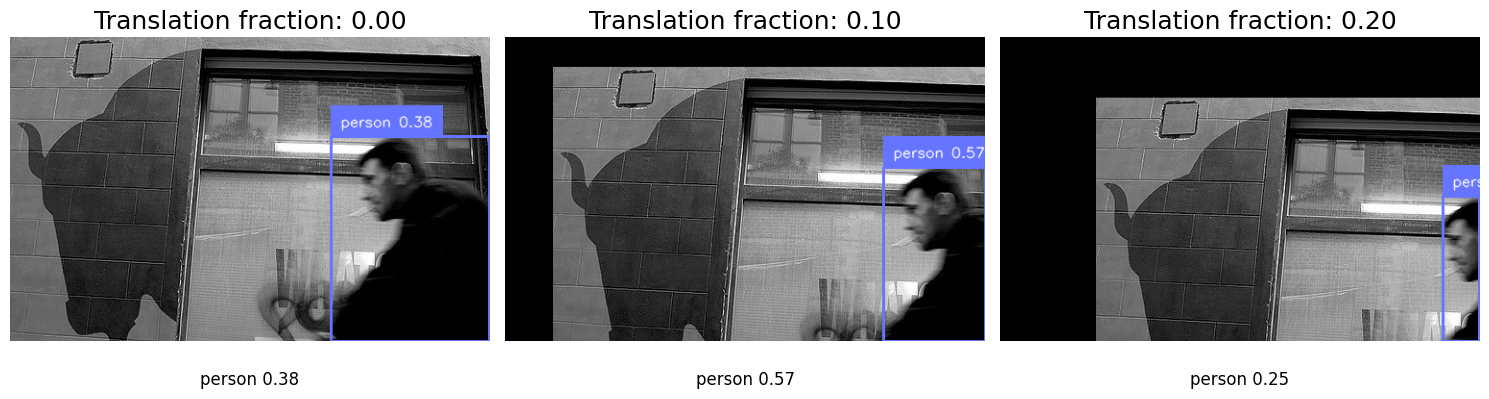

In [8]:
image_path = '/home/hugo/datasets/voc/images/val/005341.jpg'
translate_and_plot(image_path, fractions)


0: 544x800 1 car, 1 person, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 800)

0: 544x800 1 car, 1 person, 7.9ms
Speed: 2.8ms preprocess, 7.9ms inference, 0.8ms postprocess per image at shape (1, 3, 544, 800)

0: 544x800 1 car, 2 persons, 7.0ms
Speed: 2.3ms preprocess, 7.0ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 800)


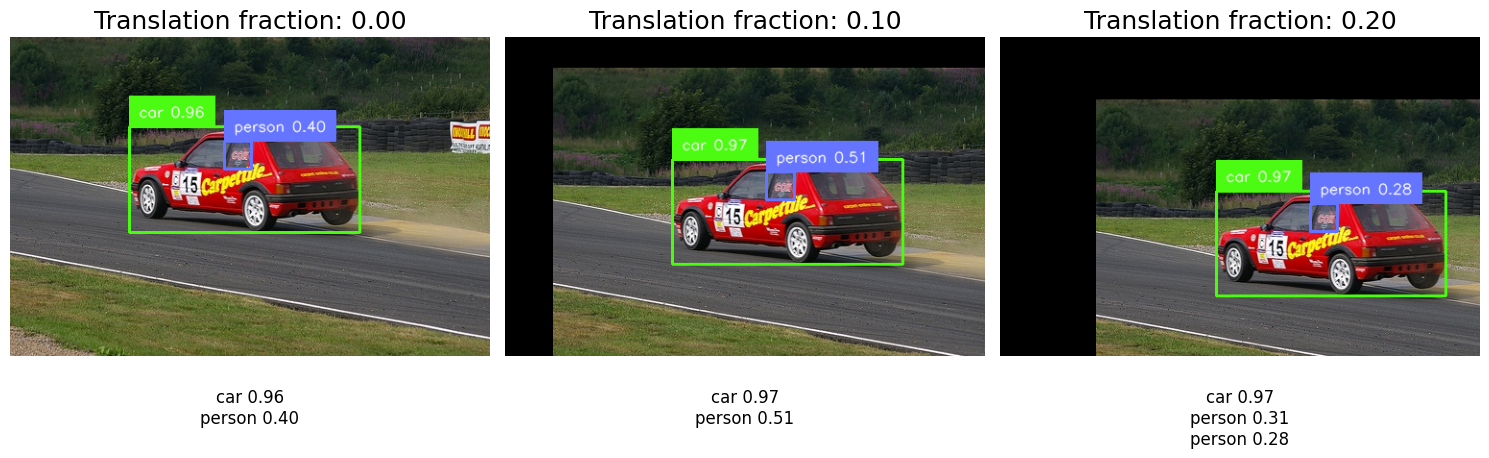

In [9]:
image_path = '/home/hugo/datasets/voc/images/val/002271.jpg'
translate_and_plot(image_path, fractions)

# learning curve plot

In [20]:
import pandas as pd
import plotly.express as px

# Read the CSV files
df_from_scratch = pd.read_csv("/home/hugo/yolov10/models/v10s_voc/results.csv", header=0)
df_fine_tune = pd.read_csv("/home/hugo/yolov10/models/v10s_voc/results_scratch.csv", header=0)

# Remove spaces in column names
df_from_scratch.columns = df_from_scratch.columns.str.replace(' ', '')
df_fine_tune.columns = df_fine_tune.columns.str.replace(' ', '')

# Keep only necessary columns
df_from_scratch = df_from_scratch[['epoch', 'metrics/mAP50(B)']]
df_from_scratch = df_from_scratch[df_from_scratch['epoch'] <= 150]
df_fine_tune = df_fine_tune[['epoch', 'metrics/mAP50(B)']]
df_fine_tune = df_fine_tune[df_fine_tune['epoch'] <= 150]


# Add a new column to distinguish the sources
df_from_scratch['Model'] = 'From Scratch'
df_fine_tune['Model'] = 'Fine Tuning'

# Concatenate dataframes
df_combined = pd.concat([df_from_scratch, df_fine_tune])

# Create a line plot using Plotly
fig = px.line(df_combined, x='epoch', y='metrics/mAP50(B)', color='Model', 
              color_discrete_map={'From Scratch': 'blue', 'Fine Tuning': 'red'},
              title='mAP50 Over Epochs: From Scratch vs. Fine-Tuning on VOC')

fig.update_layout(xaxis_title='Epoch', yaxis_title='mAP50(B)', width=600, height=450)
fig.show()

In [26]:
import pandas as pd
import plotly.express as px

# Read the CSV files
df_from_scratch = pd.read_csv("/home/hugo/yolov10/models/v10s_bdd/results_scratch.csv", header=0)
df_fine_tune = pd.read_csv("/home/hugo/yolov10/models/v10s_bdd/results.csv", header=0)

# Remove spaces in column names
df_from_scratch.columns = df_from_scratch.columns.str.replace(' ', '')
df_fine_tune.columns = df_fine_tune.columns.str.replace(' ', '')

# Keep only necessary columns
df_from_scratch = df_from_scratch[['epoch', 'metrics/mAP50(B)']]
df_from_scratch = df_from_scratch[df_from_scratch['epoch'] <= 150]
df_fine_tune = df_fine_tune[['epoch', 'metrics/mAP50(B)']]
df_fine_tune = df_fine_tune[df_fine_tune['epoch'] <= 150]


# Add a new column to distinguish the sources
df_from_scratch['Model'] = 'From Scratch'
df_fine_tune['Model'] = 'Fine Tuning'

# Concatenate dataframes
df_combined = pd.concat([df_from_scratch, df_fine_tune])

# Create a line plot using Plotly
fig = px.line(df_combined, x='epoch', y='metrics/mAP50(B)', color='Model', 
              color_discrete_map={'From Scratch': 'blue', 'Fine Tuning': 'red'},
              title='mAP50 Over Epochs: From Scratch vs. Fine-Tuning on BDD')

fig.update_layout(xaxis_title='Epoch', yaxis_title='mAP50(B)', width=600, height=450)
fig.show()

In [21]:
import pandas as pd
import plotly.express as px

# Read the CSV files
df_l = pd.read_csv("/home/hugo/yolov10/models/v10l_voc/results.csv", header=0)
df_m = pd.read_csv("/home/hugo/yolov10/models/v10m_voc/results.csv", header=0)
df_s = pd.read_csv("/home/hugo/yolov10/models/v10s_voc/results.csv", header=0)

# Remove spaces in column names
df_l.columns = df_l.columns.str.replace(' ', '')
df_m.columns = df_m.columns.str.replace(' ', '')
df_s.columns = df_s.columns.str.replace(' ', '')

# Keep only necessary columns
df_l = df_l[['epoch', 'metrics/mAP50(B)']]
df_m = df_m[['epoch', 'metrics/mAP50(B)']]
df_s = df_s[['epoch', 'metrics/mAP50(B)']]
df_l = df_l[df_l['epoch'] <= 150]
df_m = df_m[df_m['epoch'] <= 150]
df_s = df_s[df_s['epoch'] <= 150]


# Add a new column to distinguish the sources
df_l['Model'] = 'Large'
df_m['Model'] = 'Medium'
df_s['Model'] = 'Small'

# Concatenate dataframes
df_combined = pd.concat([df_l, df_m, df_s])

# Create a line plot using Plotly
fig = px.line(df_combined, x='epoch', y='metrics/mAP50(B)', color='Model', 
            color_discrete_map={'Large': 'blue', 'Medium': 'red', 'Small': 'green'},
              title='mAP50 Over Epochs: Small vs Medium vs Large on VOC')

fig.update_layout(xaxis_title='Epoch', yaxis_title='mAP50(B)', width=600, height=450)
fig.show()

In [28]:
import pandas as pd
import plotly.express as px

# Read the CSV files
df_l = pd.read_csv("/home/hugo/yolov10/models/v10l_bdd/results.csv", header=0)
df_m = pd.read_csv("/home/hugo/yolov10/models/v10m_bdd/results.csv", header=0)
df_s = pd.read_csv("/home/hugo/yolov10/models/v10s_bdd/results.csv", header=0)

# Remove spaces in column names
df_l.columns = df_l.columns.str.replace(' ', '')
df_m.columns = df_m.columns.str.replace(' ', '')
df_s.columns = df_s.columns.str.replace(' ', '')

# Keep only necessary columns
df_l = df_l[['epoch', 'metrics/mAP50(B)']]
df_m = df_m[['epoch', 'metrics/mAP50(B)']]
df_s = df_s[['epoch', 'metrics/mAP50(B)']]
df_l = df_l[df_l['epoch'] <= 100]
df_m = df_m[df_m['epoch'] <= 100]
df_s = df_s[df_s['epoch'] <= 100]


# Add a new column to distinguish the sources
df_l['Model'] = 'Large'
df_m['Model'] = 'Medium'
df_s['Model'] = 'Small'

# Concatenate dataframes
df_combined = pd.concat([df_l, df_m, df_s])

# Create a line plot using Plotly
fig = px.line(df_combined, x='epoch', y='metrics/mAP50(B)', color='Model', 
            color_discrete_map={'Large': 'blue', 'Medium': 'red', 'Small': 'green'},
              title='mAP50 Over Epochs: Small vs Medium vs Large on BDD')

fig.update_layout(xaxis_title='Epoch', yaxis_title='mAP50(B)', width=600, height=450)
fig.show()

# export to TensorRT

In [7]:
from ultralytics import YOLOv10

model = YOLOv10('/home/hugo/yolov10/models/v10s_voc/weights/best.pt')
result = model.predict("/home/hugo/datasets/voc/images/val/001516.jpg", imgsz=800, device="cuda")
result[0]
# model.export(format="engine", imgsz=800, verbose=False, workspace=4, dynamic=True, simplify=True, device=0)


image 1/1 /home/hugo/datasets/voc/images/val/001516.jpg: 608x800 7 persons, 57.0ms
Speed: 1.7ms preprocess, 57.0ms inference, 0.9ms postprocess per image at shape (1, 3, 608, 800)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'aeroplane', 1: 'bicycle', 2: 'bird', 3: 'boat', 4: 'bottle', 5: 'bus', 6: 'car', 7: 'cat', 8: 'chair', 9: 'cow', 10: 'diningtablecd', 11: 'dog', 12: 'horse', 13: 'motorbike', 14: 'person', 15: 'pottedplant', 16: 'sheep', 17: 'sofa', 18: 'train', 19: 'tvmonitor'}
obb: None
orig_img: array([[[15, 28, 44],
        [13, 27, 45],
        [19, 34, 53],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 8,  8,  8]],

       [[14, 25, 39],
        [ 5, 18, 34],
        [23, 37, 56],
        ...,
        [ 7,  7,  7],
        [ 9,  7,  7],
        [ 8,  8,  8]],

       [[ 8, 17, 30],
        [ 0,  0, 12],
        [ 0,  0, 17],
        ...,
        [12, 10, 10],
        [15, 10, 11],
        [14, 12, 12]],

       ...,

       [[48, 45, 41],
        [50, 45, 42],
        [51, 44, 41],
        ...,
        [75, 69, 62],
        [73, 67

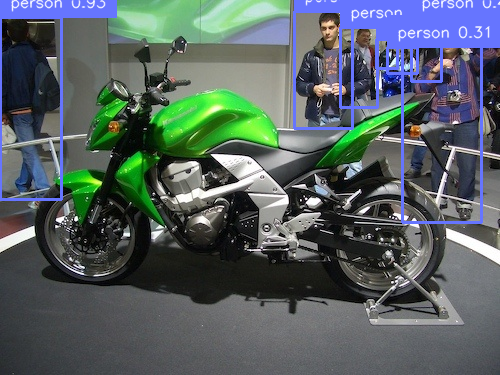

In [10]:
import supervision as sv
import cv2
from PIL import Image
image = cv2.imread("/home/hugo/datasets/voc/images/val/001516.jpg")
detections = sv.Detections.from_ultralytics(result[0])
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
labels = [
f"{class_name} {confidence:.2f}"
for class_name, confidence
in zip(detections['class_name'], detections.confidence)
]
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
scene=annotated_image, detections=detections, labels=labels)

Image.fromarray(annotated_image[..., ::-1])

In [11]:
import cv2
import numpy as np
np.bool = np.bool_
model = YOLOv10("/home/hugo/yolov10/models/v10s_voc/weights/best_batch.engine", task="detect")
img = cv2.imread("/home/hugo/datasets/voc/images/val/001516.jpg")
result2 = model.predict(img, imgsz=800, device="cuda")
result2[0].boxes

Loading /home/hugo/yolov10/models/v10s_voc/weights/best_batch.engine for TensorRT inference...
[06/19/2024-16:09:32] [TRT] [I] Loaded engine size: 30 MiB
[06/19/2024-16:09:33] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +34, now: CPU 3032, GPU 1547 (MiB)
[06/19/2024-16:09:33] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/19/2024-16:09:33] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +28, now: CPU 0, GPU 28 (MiB)
[06/19/2024-16:09:33] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 3002, GPU 1547 (MiB)
[06/19/2024-16:09:33] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/19/2024-16:09:33] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +480, now: CPU 0, GPU 508 (MiB)

0: 800x800 8 persons, 7.2ms
Speed: 3.2ms preprocess, 7.2ms inference, 0.7ms postprocess per image at shape (1, 3, 800, 800)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([14., 14., 14., 14., 14., 14., 14., 14.], device='cuda:0')
conf: tensor([0.9327, 0.8991, 0.7422, 0.5966, 0.4871, 0.4575, 0.3265, 0.2994], device='cuda:0')
data: tensor([[3.0613e-02, 1.7515e+01, 6.1584e+01, 1.9983e+02, 9.3270e-01, 1.4000e+01],
        [4.0275e+02, 2.8682e+01, 4.8113e+02, 2.2280e+02, 8.9907e-01, 1.4000e+01],
        [2.9486e+02, 1.1793e+01, 3.5208e+02, 1.2810e+02, 7.4222e-01, 1.4000e+01],
        [3.7649e+02, 3.9777e+01, 3.9761e+02, 6.8045e+01, 5.9656e-01, 1.4000e+01],
        [3.4048e+02, 2.7925e+01, 3.7719e+02, 1.0727e+02, 4.8711e-01, 1.4000e+01],
        [4.1136e+02, 1.7134e+01, 4.4111e+02, 8.1838e+01, 4.5746e-01, 1.4000e+01],
        [3.3802e+02, 2.7726e+01, 3.7504e+02, 1.2392e+02, 3.2648e-01, 1.4000e+01],
        [3.8731e+02, 4.7765e+01, 4.1712e+02, 7.3250e+01, 2.9941e-01, 1.4000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (375, 500)
shape: torch.Size([8, 6])
xywh: tensor([[ 30.80

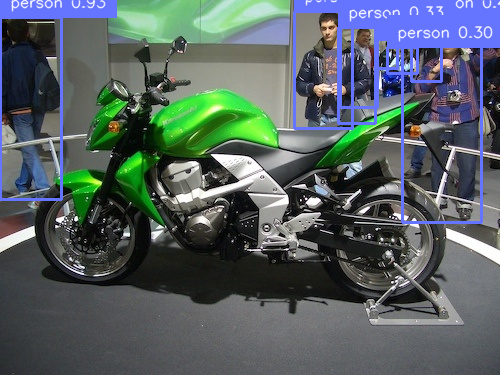

In [13]:
import supervision as sv
import cv2
from PIL import Image
image = cv2.imread("/home/hugo/datasets/voc/images/val/001516.jpg")
detections = sv.Detections.from_ultralytics(result2[0])
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
labels = [
f"{class_name} {confidence:.2f}"
for class_name, confidence
in zip(detections['class_name'], detections.confidence)
]
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
scene=annotated_image, detections=detections, labels=labels)

Image.fromarray(annotated_image[..., ::-1])

# validation using TensorRT

In [16]:
from ultralytics import YOLOv10

model = YOLOv10("/home/hugo/yolov10/models/v10s_voc/weights/best_batch.engine", task="detect")
results = model.val(
    data="/home/hugo/datasets/voc/dataset.yaml", 
    batch=8,
    imgsz=800,
    verbose=False,
    device="cuda",
    split="val"
)

Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10s_voc/weights/best_batch.engine for TensorRT inference...
[06/19/2024-16:16:04] [TRT] [I] The logger passed into createInferRuntime differs from one already provided for an existing builder, runtime, or refitter. Uses of the global logger, returned by nvinfer1::getLogger(), will return the existing value.

[06/19/2024-16:16:04] [TRT] [I] Loaded engine size: 30 MiB
[06/19/2024-16:16:05] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 3274, GPU 2919 (MiB)
[06/19/2024-16:16:05] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/19/2024-16:16:05] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +1, GPU +28, now: CPU 1, GPU 1044 (MiB)
[06/19/2024-16:16:05] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +1, GPU +32, now: CPU 3245, GPU 2919 (MiB)
[06/19/2024-16:16:05] [TRT] [W] T

val: Scanning /home/hugo/datasets/voc/labels/val.cache... 4952 images, 487 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 619/619 [00:38<00:00, 16.14it/s]


                   all       4952      12648      0.849      0.764      0.844      0.635
Speed: 0.4ms preprocess, 5.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/hugo/yolov10/yolov10FX/runs/detect/val3
